## Romberg formula 龙贝格算法

$T_1 = \frac{1}{2} (f(a) + f(b))$

$T_{2n} = \frac{1}{2} T_n + \frac{h}{2} \sum_{k=0}^{n-1} f(x_{k+\frac{1}{2}})$ 

其中 $h = \frac{b-a}{n}$ 是二分前的步长

| k     | T      | S  | C

| 0     | $T_1$

| 1     | $T_2$  | $S_1 = \frac{(4T_2 - T_1)}{(4 - 1)}$ 

| 2     | $T_4$  | $S_2 = \frac{(4T_4 - T_2)}{(4 - 1)}$ | $C_1 = \frac{(4^2 S_2 - S_1)}{(4^2 - 1)}$ 

| 3     | $T_8$  | $S_4 = \frac{(4T_8 - T_4)}{(4 - 1)}$ | $C_2 = \frac{(4^2 S_4 - S_2)}{(4^2 - 1)}$ | $R_1 = \frac{(4^3 C_2 - C_1)}{(4^3 - 1)}$ 


In [44]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# @author: weili
# @filename: romberg_formula.py
# @copyright: https://gitee.com/weili_yzzcq/MachineLearning/numerical_analysis_calculation/
# @copyright: https://github.com/2694048168/MachineLearning/numerical_analysis_calculation/
# @function: Romberg 公式求解数值积分，以及简单的测试

import math

# 被积函数 或者 某些函数值点
def integrand_function(x):
    # 避免出现除以 0 的情况
    if x == 0:
      return 1
    else:
      return math.sin(x) / x

# 复合梯形公式
def romberg_formula(integration_interval_a, integration_interval_b, integrand_function, sepsilon):
    """Compound trapezoidal formula.
    
     Romberg 公式求解数值积分，通过计算主对角线的元素之差作为误差估计，达到所需的精度即可完成数值积分，所求差值即所求的积分值。
    
    Args:
        integration_interval_a: The lower limit of integration interval.
        integration_interval_b: The upper limit of integration interval.
        integrand_function: The function to be integrated.
        sepsilon：The required calculation accuracy requirements.
    
    Returns:
        sum_R: The approximate value of romberg formula of actual integral value.
    
    Examples:
        math.sin(x) / x where [0, 1]
    >>> compound_trapezoidal_formula(0, 1, math.sin(x) / x, 1e-7)
     0.9456908635827014
    """
    # 计算 T_1
    T_1 = 1 / 2 * ( integrand_function(integration_interval_a) + integrand_function(integration_interval_b) )
    # 当前步长
    current_step_h = integration_interval_b - integration_interval_a
    
    # 计算 T_2 = T_1 + 新增加的计算点
    T_2 = 1 / 2 * T_1 + current_step_h / 2 * integrand_function((integration_interval_a + integration_interval_b) / 2)
    # 当前步长
    current_step_h = (integration_interval_b - integration_interval_a ) / 2
    
    # 计算 S_1
    S_1 = (4 * T_2 - T_1 ) / (4 - 1)
    
    # 计算误差精度
    if ((S_1 - T_1) < sepsilon):
        return S_1
    
    # 计算 T_4
    T_4 = 1 / 2 * T_2 + current_step_h / 2 * (integrand_function((integration_interval_a + integration_interval_b) / 4) + integrand_function((integration_interval_a + integration_interval_b)*3 / 4))
    # 当前步长
    current_step_h = (integration_interval_b - integration_interval_a ) / 4
    
    # 计算 S_2
    S_2 = (4 * T_4 - T_2 ) / (4 - 1)
    
    # 计算 C_1
    C_1 = (4**2 * S_2 - S_1 ) / (4**2 - 1)
    
    # 计算误差精度
    if ((C_1 - S_1) < sepsilon):
        return C_1
    
    # 计算 T_8
    T_8 = 1 / 2 * T_4 + current_step_h / 2 * (integrand_function((integration_interval_a + integration_interval_b) / 8) + 
                                      integrand_function((integration_interval_a + integration_interval_b)*3 / 8) + 
                                      integrand_function((integration_interval_a + integration_interval_b)*5 / 8) + 
                                      integrand_function((integration_interval_a + integration_interval_b)*7 / 8) )
    # 计算 S_4
    S_4 = (4 * T_8 - T_4 ) / (4 - 1)
    
    # 计算 C_2
    C_2 = (4**2 * S_4 - S_2 ) / (4**2 - 1)
    
    # 计算 R_1
    R_1 = (math.pow(4, 3) * C_2 - C_1 ) / (math.pow(4, 3) - 1)
    
    # 计算误差精度
    if ((R_1 - C_1) < sepsilon):
        return R_1
    
    # 计算失败    
    return 0


# test
if __name__ == "__main__":
    # 积分区间下限
    integration_interval_a = 0
    # 积分区间上限
    integration_interval_b = 1
    # 积分区间等间隔划分
    sepsilon = 1e-7
    
    sum_R = romberg_formula(integration_interval_a, integration_interval_b, integrand_function, sepsilon)
    print("The result of the romberg formula for the integrand function : \n", sum_R)

The result of the romberg formula for the integrand function : 
 0.9460830040636742


In [46]:
# 数值积分的被积函数
def integrand_function(x):
    return math.exp(x)

# test
if __name__ == "__main__":
    # 积分区间下限
    integration_interval_a = 0
    # 积分区间上限
    integration_interval_b = 1
    # 积分区间等间隔划分
    sepsilon = 1e-7
    
    sum_R = romberg_formula(integration_interval_a, integration_interval_b, integrand_function, sepsilon)
    print("The result of the romberg formula for the integrand function : \n", sum_R)

The result of the romberg formula for the integrand function : 
 1.7188611518765928


In [47]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# @author: weili
# @filename: romberg_formula.py
# @copyright: https://gitee.com/weili_yzzcq/MachineLearning/numerical_analysis_calculation/
# @copyright: https://github.com/2694048168/MachineLearning/numerical_analysis_calculation/
# @function: Romberg 公式求解数值积分，以及简单的测试

import math

# 被积函数 或者 某些函数值点
def integrand_function(x):
    # 避免出现除以 0 的情况
    if x == 0:
      return 1
    else:
      return math.sin(x) / x

# 复合梯形公式
def romberg_formula(integration_interval_a, integration_interval_b, integrand_function, sepsilon):
    """Compound trapezoidal formula.
    
     Romberg 公式求解数值积分，通过计算主对角线的元素之差作为误差估计，达到所需的精度即可完成数值积分，所求差值即所求的积分值。
    
    Args:
        integration_interval_a: The lower limit of integration interval.
        integration_interval_b: The upper limit of integration interval.
        integrand_function: The function to be integrated.
        sepsilon：The required calculation accuracy requirements.
    
    Returns:
        sum_R: The approximate value of romberg formula of actual integral value.
    
    Examples:
        math.sin(x) / x where [0, 1]
    >>> compound_trapezoidal_formula(0, 1, math.sin(x) / x, 1e-7)
     0.9456908635827014
    """
    # 计算 T_1
    T_1 = 1 / 2 * ( integrand_function(integration_interval_a) + integrand_function(integration_interval_b) )
    # 当前步长
    current_step_h = integration_interval_b - integration_interval_a
    
    # 计算 T_2 = T_1 + 新增加的计算点
    T_2 = 1 / 2 * T_1 + current_step_h / 2 * integrand_function((integration_interval_a + integration_interval_b) / 2)
    # 当前步长
    current_step_h = (integration_interval_b - integration_interval_a ) / 2
    
    # 计算 S_1
    S_1 = (4 * T_2 - T_1 ) / (4 - 1)
    
    # 计算误差精度
    #if ((S_1 - T_1) < sepsilon):
        #return T_1, S_1, 0, 0
    
    # 计算 T_4
    T_4 = 1 / 2 * T_2 + current_step_h / 2 * (integrand_function((integration_interval_a + integration_interval_b) / 4) + integrand_function((integration_interval_a + integration_interval_b)*3 / 4))
    # 当前步长
    current_step_h = (integration_interval_b - integration_interval_a ) / 4
    
    # 计算 S_2
    S_2 = (4 * T_4 - T_2 ) / (4 - 1)
    
    # 计算 C_1
    C_1 = (4**2 * S_2 - S_1 ) / (4**2 - 1)
    
    # 计算误差精度
    #if ((C_1 - S_1) < sepsilon):
        #return T_1, S_1, C_1, 0
    
    # 计算 T_8
    T_8 = 1 / 2 * T_4 + current_step_h / 2 * (integrand_function((integration_interval_a + integration_interval_b) / 8) + 
                                      integrand_function((integration_interval_a + integration_interval_b)*3 / 8) + 
                                      integrand_function((integration_interval_a + integration_interval_b)*5 / 8) + 
                                      integrand_function((integration_interval_a + integration_interval_b)*7 / 8) )
    # 计算 S_4
    S_4 = (4 * T_8 - T_4 ) / (4 - 1)
    
    # 计算 C_2
    C_2 = (4**2 * S_4 - S_2 ) / (4**2 - 1)
    
    # 计算 R_1
    R_1 = (math.pow(4, 3) * C_2 - C_1 ) / (math.pow(4, 3) - 1)
    
    # 计算误差精度
    #if ((R_1 - C_1) < sepsilon):
        #return T_1, S_1, C_1, R_1
    
    # 计算失败    
    return T_1, T_2, T_4, T_8, S_1, S_2, S_4, C_1, C_2, R_1


# test
if __name__ == "__main__":
    # 积分区间下限
    integration_interval_a = 0
    # 积分区间上限
    integration_interval_b = 1
    # 积分区间等间隔划分
    sepsilon = 1e-7
    
    T_1, T_2, T_4, T_8, S_1, S_2, S_4, C_1, C_2, R_1 = romberg_formula(integration_interval_a, integration_interval_b, integrand_function, sepsilon)
    print("The T_1 of the romberg formula for the integrand function :  ", T_1)
    print("The T_2 of the romberg formula for the integrand function :  ", T_2)
    print("The T_4 of the romberg formula for the integrand function :  ", T_4)
    print("The T_8 of the romberg formula for the integrand function :  ", T_8)
    print("The S_1 of the romberg formula for the integrand function :  ", S_1)
    print("The S_2 of the romberg formula for the integrand function :  ", S_2)
    print("The S_4 of the romberg formula for the integrand function :  ", S_4)
    print("The C_1 of the romberg formula for the integrand function :  ", C_1)
    print("The C_2 of the romberg formula for the integrand function :  ", C_2)
    print("The R_1 of the romberg formula for the integrand function :  ", R_1)


The T_1 of the romberg formula for the integrand function :   0.9207354924039483
The T_2 of the romberg formula for the integrand function :   0.9397932848061772
The T_4 of the romberg formula for the integrand function :   0.9445135216653896
The T_8 of the romberg formula for the integrand function :   0.9456908635827013
The S_1 of the romberg formula for the integrand function :   0.9461458822735868
The S_2 of the romberg formula for the integrand function :   0.9460869339517938
The S_4 of the romberg formula for the integrand function :   0.9460833108884718
The C_1 of the romberg formula for the integrand function :   0.9460830040636742
The C_2 of the romberg formula for the integrand function :   0.946083069350917
The R_1 of the romberg formula for the integrand function :   0.9460830703872225


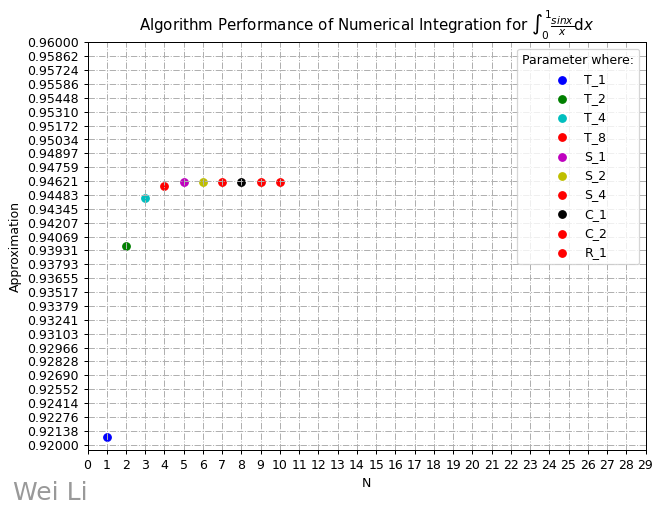

In [52]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# @author: weili
# @filename: algorithm_performance.py
# @copyright: https://gitee.com/weili_yzzcq/MachineLearning/numerical_analysis_calculation/
# @copyright: https://github.com/2694048168/MachineLearning/numerical_analysis_calculation/

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 绘制图像
fig = plt.figure(figsize = (8,6), dpi = 90)
ax = fig.add_subplot()
# Algorithm performance
ax.scatter(1, T_1, label='T_1', color='b')
ax.scatter(2, T_2, label='T_2', color='g')
ax.scatter(3, T_4, label='T_4', color='c')
ax.scatter(4, T_8, label='T_8', color='r')

ax.scatter(5, S_1, label='S_1', color='m')
ax.scatter(6, S_2, label='S_2', color='y')
ax.scatter(7, S_4, label='S_4', color='r')

ax.scatter(8, C_1, label='C_1', color='k')
ax.scatter(9, C_2, label='C_2', color='r')

ax.scatter(10, R_1, label='R_1', color='red')

# 水印开头左下角对应的 X 点， 水印开头左下角对应的 Y 点
ax.text(0, 0.914, "Wei Li", fontsize=20, color='gray', ha='right', va='bottom', alpha=0.8)

plt.title(r"Algorithm Performance of Numerical Integration for $ \int_0^1 \frac{sinx}{x} \mathrm{d}x $")
plt.xticks(range(30))
plt.yticks(np.linspace(0.920, 0.960, 30))
plt.xlabel("N")
plt.ylabel("Approximation")
plt.legend(title='Parameter where:')
plt.grid(True, linestyle='-.')
plt.show()
